In [1]:
from astropy.io.votable import is_votable, parse

In [2]:
fname = "master_field_galaxies.vot"

In [3]:
is_votable(fname)

True

In [5]:
table = parse(fname)
full  = table.get_first_table()
arr   = full.array

In [7]:
arr.dtype.names

('ID_Laigle_16',
 'RA',
 'DEC',
 'Z_MUSE',
 'CONFID',
 'Blend',
 'Defect',
 'Revisit',
 'ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO'

In [20]:
fluxOII3726     = arr['OII_3726_FLUX']
fluxOII3726_err = arr['OII_3726_FLUX_ERR']
fluxOII3729     = arr['OII_3729_FLUX']
fluxOII3729_err = arr['OII_3729_FLUX_ERR']

fluxOII_err = fluxOII3726_err + fluxOII3729_err
fluxOII     = fluxOII3726 + fluxOII3729

FWHM_OII = arr['PSF_FWHM_o2']

mass       = arr['lmass']
mass_lower = arr['l68_lmass']
mass_uper  = arr['u68_lmass']

sfr_lower = arr['l68_lsfr']
sfr_uper  = arr['u68_lsfr']
sfr       = arr['lsfr']

age_lower = arr['l68_lage']
age_uper  = arr['u68_lage']
age       = arr['lage']

In [53]:
print("{:.3e}".format(fluxOII_err.compressed().max()))

1.164e+10


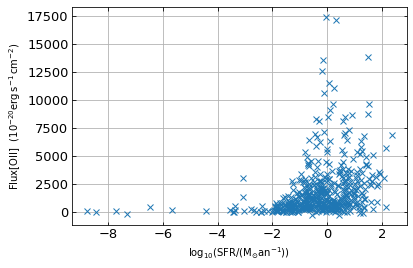

In [59]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\log_{10}(\rm{SFR}/(M_{\odot} \rm{an}^{-1}))$")

plt.plot(sfr, fluxOII, "x")

<ErrorbarContainer object of 3 artists>

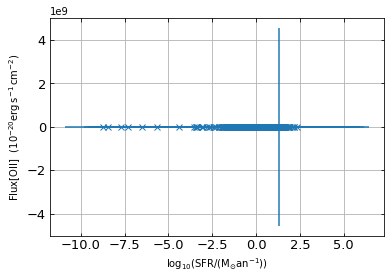

In [58]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\log_{10}(\rm{SFR}/(M_{\odot} \rm{an}^{-1}))$")

plt.errorbar(sfr, fluxOII, xerr=[sfr_lower, sfr_uper], yerr=fluxOII3729_err, marker="x")